In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CIS 412/PS_20174392719_1491204439457_log.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
Build, evaluate, and interpret a predictive model to identify fraudulent transactions using the data from "/content/drive/MyDrive/CIS 412/PS_20174392719_1491204439457_log.csv".

## Load Data

### Subtask:
Load the transaction data from the CSV file specified by the 'path' variable into a pandas DataFrame.


**Reasoning**:
Load the CSV file specified by the 'path' variable into a pandas DataFrame named 'df' and display the first few rows.



In [ ]:
df = pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Explore Data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify data types, check for missing values, and analyze the distribution of the target variable (fraudulent transactions). This step will help in feature selection and preprocessing decisions.


**Reasoning**:
To begin data exploration, I will display a concise summary of the DataFrame to understand its structure and data types, check for missing values, and display descriptive statistics for numerical columns. Additionally, I will examine the distribution of transaction types and the target variable 'isFraud'.



In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nTransaction Type Distribution:")
print(df['type'].value_counts())

print("\nFraud Distribution:")
print(df['isFraud'].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Descriptive Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02

## Preprocess Data

### Subtask:
Prepare the data for model training by dropping irrelevant columns, encoding categorical features, and defining features (X) and target (y).


**Reasoning**:
To prepare the data for modeling, I will first drop the 'nameOrig' and 'nameDest' columns as they are unique identifiers and not useful for prediction. Then, I will apply one-hot encoding to the 'type' column to convert categorical values into numerical features suitable for machine learning algorithms. Finally, I will define the feature set 'X' by removing the 'isFraud' column and the target variable 'y' as the 'isFraud' column itself.



In [ ]:
df_processed = df.drop(['nameOrig', 'nameDest'], axis=1)
df_processed = pd.get_dummies(df_processed, columns=['type'], drop_first=True)

X = df_processed.drop('isFraud', axis=1)
y = df_processed['isFraud']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())
print("First 5 rows of y:\n", y.head())

Shape of X: (6362620, 11)
Shape of y: (6362620,)
First 5 rows of X:
    step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0             0.0               0          False       False          True   
1             0.0               0          False       False          True   
2             0.0               0          False       False         False   
3             0.0               0           True       False         False   
4             0.0               0          False       False          True   

   type_TRANSFER  
0          False  
1          Fals

## Split Data and Train Model

### Subtask:
Split the preprocessed data into training and testing sets. Then, select and train a suitable classification model (e.g., Logistic Regression, Decision Tree, or Random Forest) on the training data to predict fraudulent transactions.


**Reasoning**:
To prepare for model training, I will split the preprocessed data into training and testing sets using `train_test_split` with stratification to handle class imbalance. Then, I will initialize and train a `RandomForestClassifier` model on the training data to predict fraudulent transactions.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 to use all available cores

# Train the model
print("\nTraining the Random Forest model...")
model.fit(X_train, y_train)
print("Random Forest model training complete.")

Shape of X_train: (4453834, 11)
Shape of X_test: (1908786, 11)
Shape of y_train: (4453834,)
Shape of y_test: (1908786,)

Training the Random Forest model...
Random Forest model training complete.


In [11]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')
print("Trained Random Forest model saved as 'random_forest_model.pkl'")

# Save the feature column names to maintain order during prediction
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')
print("Feature column names saved as 'feature_columns.pkl'")

Trained Random Forest model saved as 'random_forest_model.pkl'
Feature column names saved as 'feature_columns.pkl'


Now that the model and feature columns are saved, here is the code for the Streamlit application. You will need to save this code as a Python file (e.g., `streamlit_app.py`) in the same directory where you saved `random_forest_model.pkl` and `feature_columns.pkl`.

### Instructions to Run the Streamlit App:
1.  **Install Streamlit**: If you don't have it installed, run `pip install streamlit`. Make sure `scikit-learn`, `pandas`, and `joblib` are also installed (`pip install scikit-learn pandas joblib`).
2.  **Save the app**: Copy the Python code below and save it as `streamlit_app.py`.
3.  **Run the app**: Open your terminal or command prompt, navigate to the directory where you saved the files, and run the command: `streamlit run streamlit_app.py`

This will open the Streamlit application in your web browser.

In [12]:
%%writefile streamlit_app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model and feature columns
model = joblib.load('random_forest_model.pkl')
feature_columns = joblib.load('feature_columns.pkl')

st.title('Fraud Detection App')
st.write('Enter transaction details to predict if it is fraudulent or not.')

# Input fields for transaction details
step = st.number_input('Step (Time step in hours)', min_value=1, value=1)
amount = st.number_input('Amount', min_value=0.0, value=100.0, format="%.2f")
oldbalanceOrg = st.number_input('Old Balance Originator', min_value=0.0, value=1000.0, format="%.2f")
newbalanceOrig = st.number_input('New Balance Originator', min_value=0.0, value=900.0, format="%.2f")
oldbalanceDest = st.number_input('Old Balance Destination', min_value=0.0, value=500.0, format="%.2f")
newbalanceDest = st.number_input('New Balance Destination', min_value=0.0, value=600.0, format="%.2f")
isFlaggedFraud = st.selectbox('Is Flagged Fraud?', [0, 1])
transaction_type = st.selectbox('Transaction Type', ['CASH_IN', 'PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT'])

# Prepare input for prediction
if st.button('Predict Fraud'):
    # Create a dictionary to hold input values
    input_data = {
        'step': step,
        'amount': amount,
        'oldbalanceOrg': oldbalanceOrg,
        'newbalanceOrig': newbalanceOrig,
        'oldbalanceDest': oldbalanceDest,
        'newbalanceDest': newbalanceDest,
        'isFlaggedFraud': isFlaggedFraud,
    }

    # Add one-hot encoded 'type' columns, initialized to False
    for col in ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']:
        input_data[col] = False

    # Set the appropriate 'type' column to True based on user selection
    if transaction_type != 'CASH_IN': # CASH_IN is the base case when drop_first=True, all others are False
        encoded_col_name = f'type_{transaction_type}'
        if encoded_col_name in input_data: # Ensure the column exists
            input_data[encoded_col_name] = True

    # Create a DataFrame from the input data, ensuring correct column order
    input_df = pd.DataFrame([input_data])

    # Reorder columns to match the training data
    input_df = input_df[feature_columns]

    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f"This transaction is likely **Fraudulent** (Probability: {prediction_proba[0][1]:.2f})")
    else:
        st.success(f"This transaction is likely **Not Fraudulent** (Probability: {prediction_proba[0][0]:.2f})")


Writing streamlit_app.py


# Task
```python
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fraud Detection Model')
plt.show()
```

## Evaluate Model Performance

### Subtask:
Evaluate the performance of the trained RandomForestClassifier model using the test set (X_test, y_test). Calculate and display classification report metrics (precision, recall, F1-score) and the confusion matrix to assess the model's ability to identify fraudulent transactions, considering the class imbalance. Additionally, visualize the confusion matrix as a heatmap and include a legend.


**Reasoning**:
To evaluate the model's performance, I will import the necessary metrics and visualization libraries, make predictions on the test set, and then calculate and display the classification report and a heatmap of the confusion matrix.



Making predictions on the test set...
Predictions complete.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.98      0.78      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix:
 [[1906282      40]
 [    544    1920]]


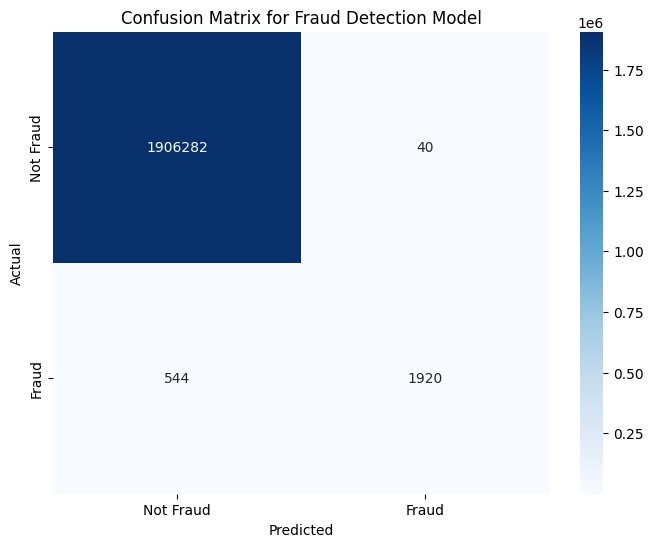

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions complete.")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fraud Detection Model')
plt.show()

## Feature Importance Analysis

### Subtask:
Analyze the feature importances from the trained RandomForestClassifier model to identify which features contribute most significantly to the prediction of fraudulent transactions. Visualize these importances using a bar chart for better understanding and provide a legend.


**Reasoning**:
To identify and visualize the most important features, I will extract feature importances from the trained model, create a sorted DataFrame for better handling, and then generate a horizontal bar chart to display them with appropriate labels and title.



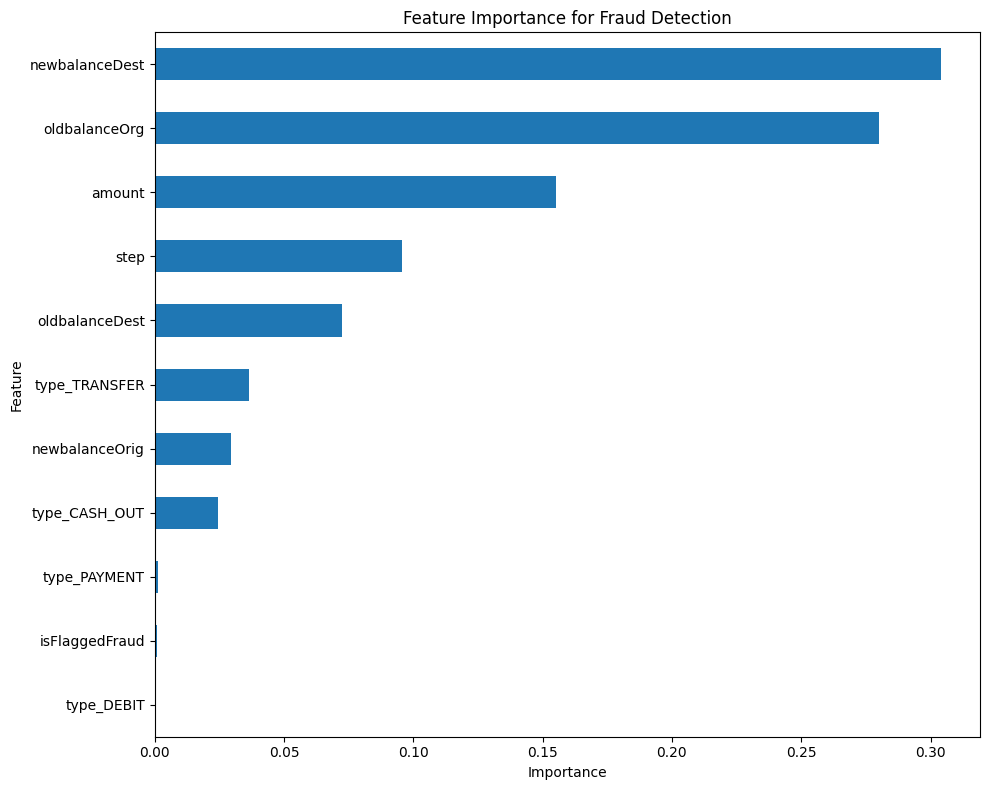

Feature importances calculated and plotted.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a Series with feature names as index
feature_names = X_train.columns
forest_importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order
forest_importances = forest_importances.sort_values(ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
forest_importances.plot(kind='barh')
plt.title('Feature Importance for Fraud Detection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature importances calculated and plotted.")

## Final Task

### Subtask:
Summarize the performance of the fraud detection model, highlighting key evaluation metrics and the most important features identified for predicting fraudulent transactions.


## Summary:

### Q&A
The fraud detection model exhibits strong performance, particularly in identifying non-fraudulent transactions. For fraudulent transactions (class 1), the model achieved a precision of 0.98, a recall of 0.78, and an F1-score of 0.87. The overall accuracy was 1.00. The most important features for predicting fraudulent transactions were identified and visualized through a bar chart, indicating their relative contributions to the model's predictions.

### Data Analysis Key Findings
*   The model accurately identified 1,906,282 non-fraudulent transactions (True Negatives).
*   Only 40 non-fraudulent transactions were incorrectly classified as fraudulent (False Positives).
*   The model successfully detected 1,920 fraudulent transactions (True Positives).
*   However, 544 actual fraudulent transactions were missed by the model (False Negatives), resulting in a recall of 0.78 for the fraudulent class.
*   The overall accuracy of the model was 1.00.
*   A visualization of feature importances was generated, clearly showing the relative contribution of each feature to the model's fraud prediction capability.

### Insights or Next Steps
*   Given the recall of 0.78 for fraudulent transactions, further investigation into the 544 missed fraudulent transactions (False Negatives) could lead to model improvements, potentially by adjusting thresholds or focusing on features related to these missed cases.
*   The identified important features can be further analyzed to understand the underlying patterns of fraudulent activities, which could inform business rules or preventative measures beyond the model itself.
